## Gaussian Mixture Models
##### Jessica Morrise

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import seaborn
import pylab

The variable $k$ represents the number of Gaussians we will draw our data from. For this example, we will use only one-dimension Gaussians. We then choose the weights or mixing coefficients $L$, the means $\mu$, and the variances $\sigma^2$.

In [36]:
# set actual parameters
k = 4 # number of Gaussians
L_actual = [1.5,1.0,0.5,1.0]
L_actual = [l/sum(L_actual) for l in L_actual] # normalize L
mu_actual = [-6.0,-3.2,0.5,5.5]
var_actual = [3.0,1.0,1.0,1.5]

Here we plot the actual distribution alongside some sample data.

In [50]:
# function to generate data
def generate_data(n):
    data = np.empty((n,1))
    for i in xrange(n):
        j = 0
        rand = np.random.rand()
        l = L_actual[j]
        while l < rand:
            j += 1
            l += L_actual[j]
        datum = np.random.normal(loc=mu_actual[j],scale=var_actual[j]**0.5)
        data[i] = datum
    return data

#Function to plot the distribution
def plot_actual():
    domain = np.linspace(-10, 10, 201)
    y = np.zeros_like(domain)
    for j in xrange(k):
        y_j = stats.norm(loc=mu_actual[j],scale=var_actual[j]**0.5).pdf(domain)*L_actual[j] #stats.norm takes std dev
        plt.plot(domain, y_j,'g--')
        y += y_j
    plt.plot(domain,y,'g', linewidth=3, label="Actual distribution")

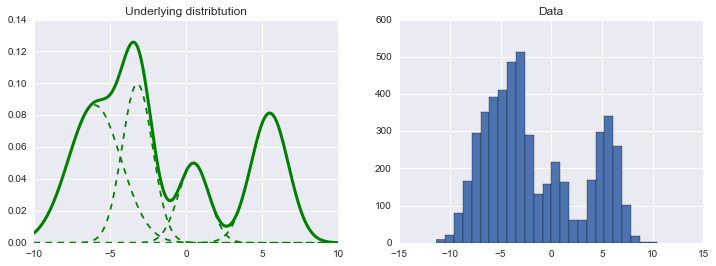

In [51]:
pylab.rcParams['figure.figsize'] = (12.0,4.0)
plt.subplot(1,2,1)
plot_actual()
plt.title('Underlying distribtution')
plt.subplot(1,2,2)
plt.hist(generate_data(5000), bins=25)
plt.title('Data')
plt.show()

The function below computes a single iteration of the EM algorithm for a Gaussian mixture model.

In [39]:
def iterate_parameters(k,L,mu,var,D):
    # create normal distributions
    normals = []
    for j in xrange(k):
        normals.append(stats.norm(loc=mu[j], scale=var[j]**0.5))
    p_data = sum([L[j]*normals[j].pdf(D) for j in xrange(k)]) # normalizing coefficients
   
    # update the weights
    weights = []
    for j in xrange(k):
        weights.append(L[j]*normals[j].pdf(D)/p_data)
        
    # update parameters
    L = [w.mean() for w in weights]
    mu = [np.sum(w*D)/w.sum() for w in weights]
    var = [np.sum(w*(D-c)**2)/w.sum() for w,c in zip(weights,mu)]
    
    return L, mu, var

To run the algorithm, we choose initial guesses for the mixing coefficients, means, and variances below. Note that the initial guesses aren't that close to the actual values. The next cell runs the algorithm for $n_{iters}$ iterations and estimates the correct values for $L$, $\mu$, and $\sigma^2$ for each Gaussian.

In [53]:
# run the EM algorithm

# initial guesses
L = [1.0,1.0,1.0,1.0]
L = [l/sum(L) for l in L] #normalize L
mu = [-6.0,-3.0,0.0,3.0]
var = [3.0,3.0,3.0,3.0]

#data
n_data = 1500
data = generate_data(n_data)

print "Actual:"
for j in xrange(k):
    print "Gaussian #%d: L = %.5f, mu = %.5f, var = %.5f"%(j+1,L_actual[j],mu_actual[j],var_actual[j])
print "---------\n"

n_iters = 280
for t in xrange(1,n_iters):
    L, mu, var = iterate_parameters(k,L,mu,var,data)
    if t%50==0:
        print "Iteration %d"%(t)
        for j in xrange(k):
            print "Gaussian #%d: L = %.5f, mu = %.5f, var = %.5f"%(j+1,L[j],mu[j],var[j])
        print "\n"
            
print "Final:"
for j in xrange(k):
    print "Gaussian #%d: L = %.5f, mu = %.5f, var = %.5f"%(j+1,L[j],mu[j],var[j])

Actual:
Gaussian #1: L = 0.37500, mu = -6.00000, var = 3.00000
Gaussian #2: L = 0.25000, mu = -3.20000, var = 1.00000
Gaussian #3: L = 0.12500, mu = 0.50000, var = 1.00000
Gaussian #4: L = 0.25000, mu = 5.50000, var = 1.50000
---------

Iteration 50
Gaussian #1: L = 0.35200, mu = -6.18988, var = 2.89536
Gaussian #2: L = 0.26479, mu = -3.34936, var = 0.93153
Gaussian #3: L = 0.14247, mu = 0.37660, var = 1.07815
Gaussian #4: L = 0.24075, mu = 5.55369, var = 1.45376


Iteration 100
Gaussian #1: L = 0.36149, mu = -6.13086, var = 2.98544
Gaussian #2: L = 0.25476, mu = -3.33127, var = 0.89430
Gaussian #3: L = 0.14303, mu = 0.37042, var = 1.08884
Gaussian #4: L = 0.24072, mu = 5.55406, var = 1.45298


Iteration 150
Gaussian #1: L = 0.36678, mu = -6.09827, var = 3.03561
Gaussian #2: L = 0.24916, mu = -3.32199, var = 0.87322
Gaussian #3: L = 0.14337, mu = 0.36676, var = 1.09560
Gaussian #4: L = 0.24069, mu = 5.55431, var = 1.45244


Iteration 200
Gaussian #1: L = 0.36982, mu = -6.07959, var = 3

Below is a visualization of our data vs. our estimations. The Gaussians we estimated are drawn in black, and the true distribution is in green.

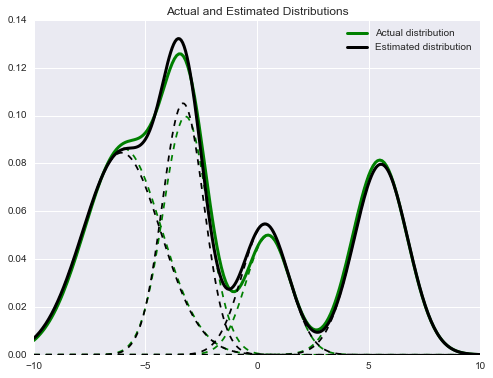

In [54]:
pylab.rcParams['figure.figsize'] = (8.0,6.0)

data_counts, data_x = np.histogram(data,bins=15)
plot_actual()

domain = np.linspace(-10,10,301)
y = np.zeros_like(domain)
for j in xrange(k):
    y_j = stats.norm(loc=mu[j],scale=var[j]**0.5).pdf(domain)*L[j] # 
    plt.plot(domain, y_j,'k--')
    y += y_j
plt.plot(domain, y, 'k', linewidth=3, label="Estimated distribution")
plt.legend(loc=0)
plt.title('Actual and Estimated Distributions')
plt.show()